# Đề thi Cuối kỳ Hệ khuyến nghị 2025 (đề thi mẫu).

## Khoa học dữ liệu IUH. Thời gian làm bài: 90 phút.

**Bài 1.** (3 điểm) Đánh giá việc phân tích ma trận.

Cho một bảng *utility matrix* giữa 4 user và 4 item, trong đó có một số missing rating:

|Rating     | $I_1$    | $I_2$  | $I_3$   |  $I_4$  |
|----------|----------|--------|---------|---------|
| $U_1$    | 5     | 5     | 3    |   4 |
| $U_2$ | 4    | 4      | 2     |   ?    |
| $U_3$  | 4     | ?      |   2  |    3 |
| $U_4$|   4  |   5    | ? |   2|

Bằng cách sử dụng kỹ thuật phân tích ma trận của lọc cộng tác, ta thu được hai ma trận sau như bên dưới:

$A=\left[ \begin{align}
  & \begin{matrix}
   1.2 & 1.8  \\
\end{matrix} \\
 & \begin{matrix}
   1.5 & 0.9  \\
\end{matrix} \\
 & \begin{matrix}
   1.5 & 1  \\
\end{matrix} \\
 & \begin{matrix}
   2 & 0.5  \\
\end{matrix} \\
\end{align} \right]$ và $\text{ }B=\left[ \begin{align}
  & \begin{matrix}
   1.5 & 2 & 0.8 & 0.7  \\
\end{matrix} \\
 & \begin{matrix}
   1.7 & 1.5 & 1.1 & 1.8  \\
\end{matrix} \\
\end{align} \right]$.

1. Hãy dự đoán giá trị cho các missing value.
2. Sử dụng thư viện scikit-learn để chạy lại lần nữa với số latent factor là $k=3$ và so sánh với kết quả trên (tham khảo lab 6).

In [ ]:
import numpy as np

A = np.array([
    [1.2, 1.8],
    [1.5, 0.9],
    [1.5, 1.0],
    [2.0, 0.5]
])

B = np.array([
    [1.5, 2.0, 0.8, 0.7],
    [1.7, 1.5, 1.1, 1.8]
])

R_hat = A @ B   # hoặc np.dot(A, B)
print(np.round(R_hat, 2))


[[4.86 5.1  2.94 4.08]
 [3.78 4.35 2.19 2.67]
 [3.95 4.5  2.3  2.85]
 [3.85 4.75 2.15 2.3 ]]


In [ ]:
import numpy as np
from sklearn.decomposition import NMF

R = np.array([
    [5, 5, 3, 4],
    [4, 4, 2, np.nan],
    [4, np.nan, 2, 3],
    [4, 5, np.nan, 2]
], dtype=float)

print("Ma trận R (với NaN):")
print(R)


Ma trận R (với NaN):
[[ 5.  5.  3.  4.]
 [ 4.  4.  2. nan]
 [ 4. nan  2.  3.]
 [ 4.  5. nan  2.]]


In [ ]:
# mask các ô đã quan sát
mask_observed = ~np.isnan(R)
print("Mask các ô đã quan sát:")
print(mask_observed)
# trung bình các rating quan sát được
global_mean = np.nanmean(R)
print("Global mean của các rating:", global_mean)

# điền ô thiếu bằng global mean
R_filled = np.where(mask_observed, R, global_mean)

print("Ma trận R_filled (đã điền thiếu):")
print(np.round(R_filled, 3))


Mask các ô đã quan sát:
[[ True  True  True  True]
 [ True  True  True False]
 [ True False  True  True]
 [ True  True False  True]]
Global mean của các rating: 3.6153846153846154
Ma trận R_filled (đã điền thiếu):
[[5.    5.    3.    4.   ]
 [4.    4.    2.    3.615]
 [4.    3.615 2.    3.   ]
 [4.    5.    3.615 2.   ]]


In [ ]:
k = 3  # số latent factors

nmf = NMF(
    n_components=k,
    init="random",
    random_state=42,
    max_iter=5000
)

W = nmf.fit_transform(R_filled)  # user–factor (4xk)
H = nmf.components_              # factor–item (k x 4)

R_hat3 = W @ H                   # ma trận rating xấp xỉ (4x4)

print("Ma trận R_hat (k=3, làm tròn 2 chữ số):")
print(np.round(R_hat3, 2))


Ma trận R_hat (k=3, làm tròn 2 chữ số):
[[5.01 5.06 2.92 3.97]
 [4.   3.96 2.05 3.64]
 [4.   3.59 2.02 3.01]
 [4.   4.99 3.63 2.01]]


In [ ]:
print("Dự đoán missing với k=3 (NMF):")

print("U2, I4:", R_hat3[1, 3])  # r_24
print("U3, I2:", R_hat3[2, 1])  # r_32
print("U4, I3:", R_hat3[3, 2])  # r_43


Dự đoán missing với k=3 (NMF):
U2, I4: 3.6386398713915855
U3, I2: 3.5947068029796814
U4, I3: 3.6328645111485116


In [ ]:
# k=2: dùng đúng A,B đề bài cho
A2 = np.array([
    [1.2, 1.8],
    [1.5, 0.9],
    [1.5, 1.0],
    [2.0, 0.5]
])

B2 = np.array([
    [1.5, 2.0, 0.8, 0.7],
    [1.7, 1.5, 1.1, 1.8]
])

R_hat2 = A2 @ B2  # ma trận xấp xỉ với k=2

def rmse_on_known(pred, true, mask):
    diff = pred[mask] - true[mask]
    return np.sqrt(np.mean(diff ** 2))

rmse2 = rmse_on_known(R_hat2, R, mask_observed)
rmse3 = rmse_on_known(R_hat3, R, mask_observed)

print("RMSE trên các ô đã biết:")
print("  - k=2 (A,B đề bài):", rmse2)
print("  - k=3 (NMF sklearn):", rmse3)


RMSE trên các ô đã biết:
  - k=2 (A,B đề bài): 0.20316722933810732
  - k=3 (NMF sklearn): 0.036261403243337265


**Bài 2.** (2 điểm) Cho ma trận user-item như sau, trong đó ở ô màu vàng: là testing rating trong đó số bên phải là giá trị được dự đoán bởi mô hình,
số bên trái là giá trị thực tế.

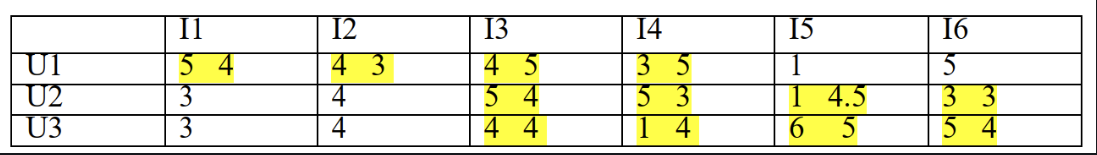

1. Hãy tính F-score của U1, U2, U3 và của cả hệ thống.
2. Hãy tính RMSE của cả hệ thống.

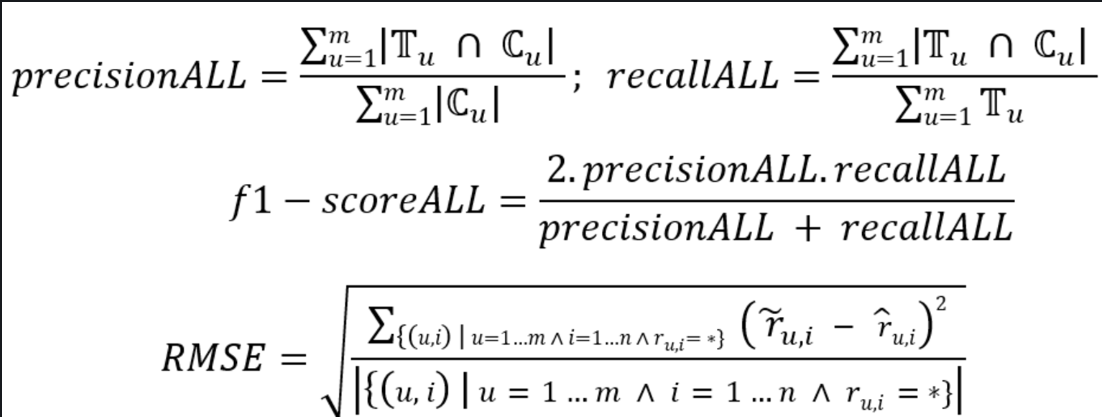

In [ ]:
import numpy as np

# (item, rating_thật, rating_dự_đoán)
data = {
    "U1": [("I1", 5, 4),
           ("I2", 4, 3),
           ("I3", 4, 5),
           ("I4", 3, 5)],
    "U2": [("I3", 5, 4),
           ("I4", 5, 3),
           ("I5", 1, 4.5),
           ("I6", 3, 3)],
    "U3": [("I3", 4, 4),
           ("I4", 1, 4),
           ("I5", 6, 5),
           ("I6", 5, 4)],
}

threshold = 4


In [ ]:
def f1_for_user(ratings, thr=4):
    # T_u: item thật sự tốt (rating thật >= thr)
    Tu = {i for i, r_true, r_pred in ratings if r_true >= thr}
    # C_u: item hệ thống dự đoán là tốt (rating dự đoán >= thr)
    Cu = {i for i, r_true, r_pred in ratings if r_pred >= thr}
    inter = Tu & Cu

    precision = len(inter) / len(Cu) if len(Cu) > 0 else 0.0
    recall    = len(inter) / len(Tu) if len(Tu) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1, Tu, Cu, inter

per_user = {}
sum_TC = 0  # tổng |T_u ∩ C_u|
sum_C  = 0  # tổng |C_u|
sum_T  = 0  # tổng |T_u|

for u, ratings in data.items():
    p, r, f1, Tu, Cu, inter = f1_for_user(ratings, thr=threshold)
    per_user[u] = (p, r, f1)
    sum_TC += len(inter)
    sum_C  += len(Cu)
    sum_T  += len(Tu)

# In kết quả từng user
for u, (p, r, f1) in per_user.items():
    print(f"{u}: precision={p:.3f}, recall={r:.3f}, F1={f1:.3f}")


U1: precision=0.667, recall=0.667, F1=0.667
U2: precision=0.500, recall=0.500, F1=0.500
U3: precision=0.750, recall=1.000, F1=0.857


In [ ]:
precision_all = sum_TC / sum_C     # Σ|T_u ∩ C_u| / Σ|C_u|
recall_all    = sum_TC / sum_T     # Σ|T_u ∩ C_u| / Σ|T_u|
f1_all = 2 * precision_all * recall_all / (precision_all + recall_all)

print(f"precisionALL = {precision_all:.3f}")
print(f"recallALL    = {recall_all:.3f}")
print(f"F1_ALL       = {f1_all:.3f}")


precisionALL = 0.667
recallALL    = 0.750
F1_ALL       = 0.706


In [ ]:
sq_errors = []  # (r_true - r_pred)^2 cho mọi ô test

for u, ratings in data.items():
    for item, r_true, r_pred in ratings:
        sq_errors.append((r_true - r_pred) ** 2)

rmse = np.sqrt(np.mean(sq_errors))

print("Tổng số ô test:", len(sq_errors))
print("RMSE toàn hệ thống:", rmse)


Tổng số ô test: 12
RMSE toàn hệ thống: 1.713913650100261


**Bài 3.** (2.5 điểm) Cho sẵn hệ khuyến nghị bằng hình ảnh tương tự lab 7, có đưa sẵn code cài đặt (trong đề thi sẽ có cung cấp code phần này). Yêu cầu:
1) SV tự tổng hợp một số hình ảnh làm dữ liệu theo chủ đề tự chọn và chạy với code đề cho.
2) Tự demo với một số hình ảnh và đưa ra nhận xét chung về độ hiệu quả của mô hình. Thử đề xuất cách điều chỉnh cài đặt đã có để cải tiến hệ thống tốt hơn.

In [ ]:
!pip install tensorflow opencv-python

import numpy as np
import pickle as pkl
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
if not os.path.exists('small_images'):
    os.makedirs('small_images')
    print("Đã tạo 'small_images', hãy copy ảnh chủ đề của bạn vào đây trước khi chạy tiếp.")

# Lấy full path tất cả ảnh
filenames = ["/content/10000.jpg", "/content/10012.jpg", "/content/10027.jpg", "/content/10028.jpg", "/content/10062.jpg"]
for file in os.listdir('small_images'):
    if file.lower().endswith((".jpg", ".jpeg", ".png")):
        filenames.append(os.path.join('small_images', file))

print("Số ảnh tìm được:", len(filenames))
print("Ví dụ vài file:", filenames[:5])


Đã tạo 'small_images', hãy copy ảnh chủ đề của bạn vào đây trước khi chạy tiếp.
Số ảnh tìm được: 5
Ví dụ vài file: ['/content/10000.jpg', '/content/10012.jpg', '/content/10027.jpg', '/content/10028.jpg', '/content/10062.jpg']


In [ ]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # freeze

model = tf.keras.models.Sequential([
    base_model,
    GlobalMaxPool2D()
])

model.summary()

# advanced
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess

# base_model_eff = EfficientNetB0(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(224, 224, 3)
# )
# base_model_eff.trainable = False

# model_eff = tf.keras.models.Sequential([
#     base_model_eff,
#     GlobalMaxPool2D()
# ])

# def extract_features_eff(image_path, model):
#     img = image.load_img(image_path, target_size=(224, 224))
#     img_array = image.img_to_array(img)
#     img_expand_dim = np.expand_dims(img_array, axis=0)
#     img_preprocess = eff_preprocess(img_expand_dim)
#     result = model.predict(img_preprocess, verbose=0).flatten()
#     return result / norm(result)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
def extract_features_from_images(image_path, model):
    # Load ảnh & resize về 224x224
    img = image.load_img(image_path, target_size=(224, 224))
    # Đưa về numpy array
    img_array = image.img_to_array(img)
    # Thêm batch dimension
    img_expand_dim = np.expand_dims(img_array, axis=0)
    # Chuẩn hóa theo ResNet50
    img_preprocess = preprocess_input(img_expand_dim)
    # Trích đặc trưng
    result = model.predict(img_preprocess, verbose=0).flatten()
    # Chuẩn hóa vector (L2 norm = 1)
    norm_result = result / norm(result)
    return norm_result

image_features = []

for file in filenames:
    feat = extract_features_from_images(file, model)
    image_features.append(feat)

image_features = np.array(image_features)

print("Shape image_features:", image_features.shape)

# Lưu lại để lần sau load cho nhanh
pkl.dump(image_features, open('Images_features.pkl', 'wb'))
pkl.dump(filenames,       open('filenames.pkl', 'wb'))



Shape image_features: (5, 2048)


In [ ]:
image_features = pkl.load(open('Images_features.pkl', 'rb'))
filenames      = pkl.load(open('filenames.pkl', 'rb'))


In [ ]:
n_neighbors = min(5, len(image_features))  # lấy tối đa 5 gợi ý
neighbors = NearestNeighbors(
    n_neighbors=n_neighbors,
    algorithm='brute',
    metric='euclidean',   # có thể đổi thành 'cosine' ở phần cải tiến
)
neighbors.fit(image_features)

def get_image_recommendations(image_path, model, neighbors, filenames):
    # 1) Trích đặc trưng ảnh đầu vào
    input_feature = extract_features_from_images(image_path, model)

    # 2) Tìm hàng xóm gần nhất
    distance, indices = neighbors.kneighbors([input_feature])

    # 3) Vẽ ảnh input + K ảnh gợi ý
    fig, axes = plt.subplots(1, len(indices[0]) + 1, figsize=(15, 5))

    # Ảnh input
    img_in = cv2.imread(image_path)
    img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
    axes[0].imshow(img_in)
    axes[0].set_title("Input")
    axes[0].axis("off")

    # Các ảnh gợi ý
    for i, idx in enumerate(indices[0]):
        rec_path = filenames[idx]
        img = cv2.imread(rec_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i+1].imshow(img)
        axes[i+1].set_title(f"Rec {i+1}")
        axes[i+1].axis("off")

    plt.tight_layout()
    plt.show()


Query: /content/10000.jpg


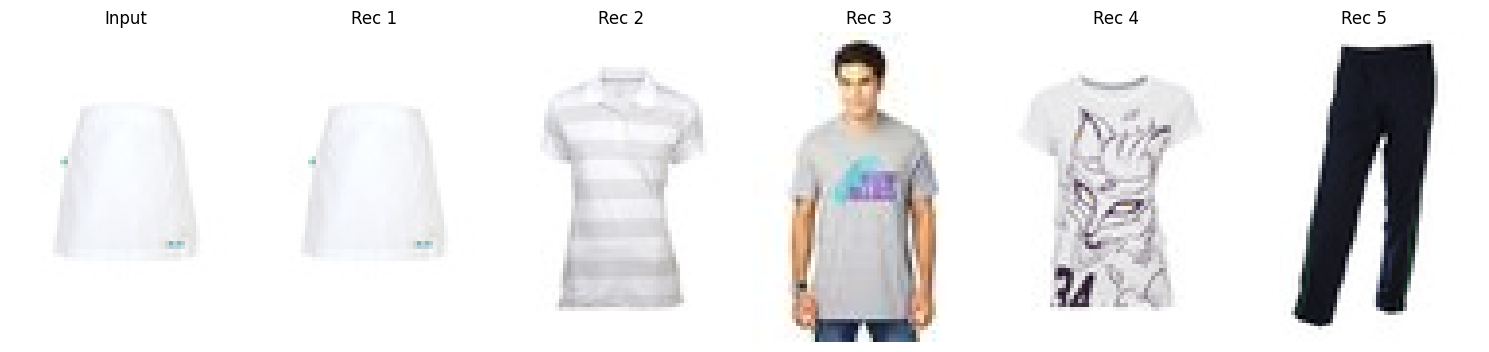

Query: /content/10027.jpg


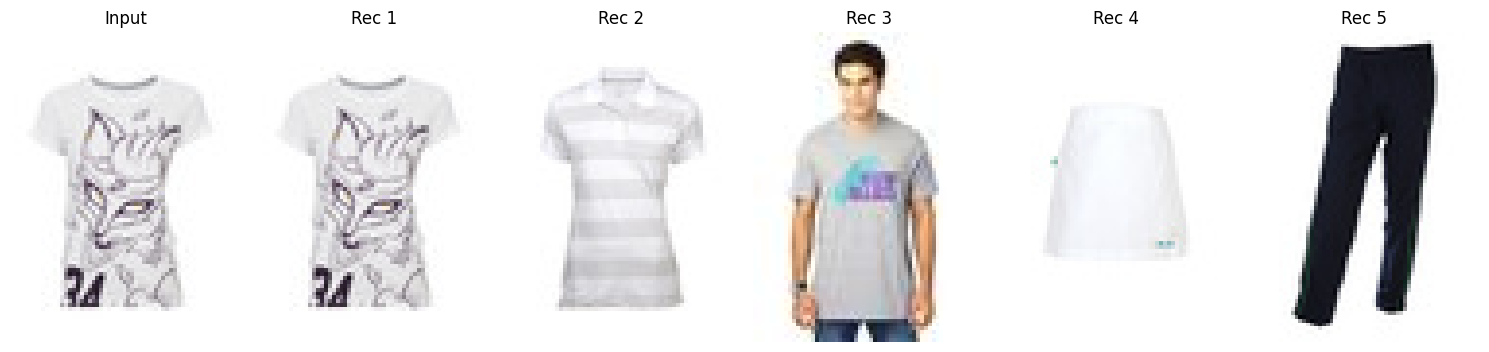

Query: /content/10062.jpg


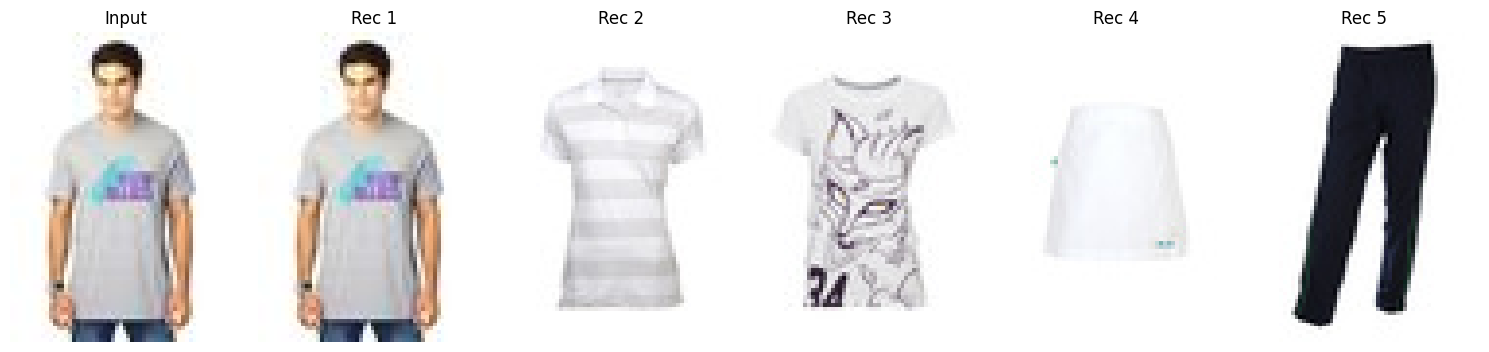

In [ ]:
# Chọn 3 ảnh bất kỳ trong dataset của bạn để test
test_images = [
    filenames[0],
    filenames[len(filenames)//2],
    filenames[-1]
]

for path in test_images:
    print("Query:", path)
    get_image_recommendations(path, model, neighbors, filenames)


**Bài 4.** (2.5 điểm) Trong HAI chọn MỘT.

Tìm hiểu về cách cài đặt phương pháp lọc cộng tác trong hệ khuyến nghị bằng một trong hai kỹ thuật deep learning (SV tự tìm hiểu trước trên Internet), sử dụng bộ dữ liệu MovieLen kích thước vừa và nhỏ, train ít epoch:

1. autoencoder.
2. Restricted Boltzmann Machines.

In [ ]:
!pip install -q pandas numpy scikit-learn tensorflow

# PyTorch thường có sẵn trên Colab, nếu thiếu thì:
# !pip install -q torch

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
!wget -q https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip

ratings = pd.read_csv("ml-latest-small/ratings.csv")
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# map userId, movieId về index liên tục
user_ids = ratings['userId'].unique()
movie_ids = ratings['movieId'].unique()

user2idx = {u: i for i, u in enumerate(user_ids)}
movie2idx = {m: i for i, m in enumerate(movie_ids)}

ratings['user_idx']  = ratings['userId'].map(user2idx)
ratings['movie_idx'] = ratings['movieId'].map(movie2idx)

n_users = len(user_ids)
n_items = len(movie_ids)
print("n_users =", n_users, "n_items =", n_items)

# chia train/test theo rating
train_df, test_df = train_test_split(
    ratings,
    test_size=0.2,
    random_state=42
)
len(train_df), len(test_df)


n_users = 610 n_items = 9724


(80668, 20168)

# Collaborative Filtering bằng Autoencoder

In [ ]:
R_train = np.zeros((n_users, n_items), dtype=np.float32)

for row in train_df.itertuples():
    R_train[row.user_idx, row.movie_idx] = row.rating

R_train.shape


(610, 9724)

In [ ]:
n_items = R_train.shape[1]

input_layer = layers.Input(shape=(n_items,))

# Encoder
x = layers.Dense(256, activation="relu",
                 activity_regularizer=regularizers.l2(1e-6))(input_layer)
x = layers.Dense(128, activation="relu")(x)

# Bottleneck = latent factors
latent = layers.Dense(64, activation="relu", name="latent")(x)

# Decoder
x = layers.Dense(128, activation="relu")(latent)
x = layers.Dense(256, activation="relu")(x)
output_layer = layers.Dense(n_items, activation="linear")(x)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 9724)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,489,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9724)           │     2,499,068 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,071,164 (19.34 MB)

 Trainable params: 5,071,164 (19.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 64
epochs = 10   # theo đề: train ít epoch (5–10 là ổn)

history = autoencoder.fit(
    R_train, R_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - loss: 0.1753 - val_loss: 0.2498
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 0.1568 - val_loss: 0.2367
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.1466 - val_loss: 0.2379
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - loss: 0.1493 - val_loss: 0.2288
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.1373 - val_loss: 0.2335
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.1478 - val_loss: 0.2305
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - loss: 0.1440 - val_loss: 0.2278
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 0.1428 - val_loss: 0.2240
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.1355 - val_loss: 0.2246
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.1345 - val_loss: 0.2256


In [ ]:
# dự đoán ma trận rating cho toàn bộ user
R_pred = autoencoder.predict(R_train, verbose=0)

y_true, y_pred = [], []

for row in test_df.itertuples():
    u = row.user_idx
    i = row.movie_idx
    y_true.append(row.rating)
    y_pred.append(R_pred[u, i])

y_true = np.array(y_true, dtype=np.float32)
y_pred = np.array(y_pred, dtype=np.float32)

rmse_auto = np.sqrt(mean_squared_error(y_true, y_pred))
print("Test RMSE (Autoencoder, few epochs):", rmse_auto)


Test RMSE (Autoencoder, few epochs): 3.1528773653842523


In [ ]:
def recommend_for_user(user_raw_id, R_pred, ratings, movie2idx, top_k=10):
    u = user2idx[user_raw_id]

    seen_idx = ratings[ratings['userId'] == user_raw_id]['movie_idx'].values

    scores = np.copy(R_pred[u])
    scores[seen_idx] = -1e9  # loại phim đã xem

    top_items = np.argsort(scores)[-top_k:][::-1]
    idx2movie = {v: k for k, v in movie2idx.items()}
    rec_movie_ids = [idx2movie[i] for i in top_items]
    return rec_movie_ids, top_items

movies = pd.read_csv("ml-latest-small/movies.csv")

user_demo = ratings['userId'].iloc[0]
rec_ids, _ = recommend_for_user(user_demo, R_pred, ratings, movie2idx, top_k=5)

print("Gợi ý cho user", user_demo, ":")
movies[movies['movieId'].isin(rec_ids)][['movieId', 'title']]


Gợi ý cho user 1 :


,movieId,title
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
277,318,"Shawshank Redemption, The (1994)"
322,364,"Lion King, The (1994)"
507,589,Terminator 2: Judgment Day (1991)
659,858,"Godfather, The (1972)"


# Collaborative Filtering bằng RBM

In [ ]:
# dùng toàn bộ dữ liệu (train_df) để tạo implicit matrix
R_train_bin = np.zeros((n_users, n_items), dtype=np.float32)

for row in train_df.itertuples():
    R_train_bin[row.user_idx, row.movie_idx] = 1.0 if row.rating >= 4.0 else 0.0

R_train_bin.shape


(610, 9724)

In [ ]:
class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden):
        super().__init__()
        self.W  = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.01)
        self.vb = nn.Parameter(torch.zeros(n_visible))
        self.hb = nn.Parameter(torch.zeros(n_hidden))

    def sample_h(self, v):
        # v: (batch, n_visible)
        prob = torch.sigmoid(torch.matmul(v, self.W.t()) + self.hb)
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        # h: (batch, n_hidden)
        prob = torch.sigmoid(torch.matmul(h, self.W) + self.vb)
        return prob, torch.bernoulli(prob)

n_visible = n_items
n_hidden  = 128  # số latent factors ẩn trong RBM

rbm = RBM(n_visible, n_hidden)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rbm.to(device)


RBM()

In [ ]:
batch_size = 64
epochs_rbm = 5   # train ít epoch cho nhanh

optimizer = optim.SGD(rbm.parameters(), lr=0.1)

train_tensor = torch.from_numpy(R_train_bin).float().to(device)

n_batches = int(np.ceil(train_tensor.size(0) / batch_size))

for epoch in range(epochs_rbm):
    epoch_loss = 0.0

    for b in range(n_batches):
        v0 = train_tensor[b*batch_size : (b+1)*batch_size]

        # Positive phase
        ph0, h0 = rbm.sample_h(v0)

        # Negative phase (CD-1)
        pvk, vk = rbm.sample_v(h0)
        phk, hk = rbm.sample_h(vk)

        # CD-1 gradient
        # (lấy average theo batch)
        W_grad  = (torch.matmul(ph0.t(), v0) - torch.matmul(phk.t(), vk)) / v0.size(0)
        vb_grad = torch.mean(v0 - vk, dim=0)
        hb_grad = torch.mean(ph0 - phk, dim=0)

        # gán gradient thủ công
        rbm.W.grad  = -W_grad
        rbm.vb.grad = -vb_grad
        rbm.hb.grad = -hb_grad

        optimizer.step()
        optimizer.zero_grad()

        batch_loss = torch.mean((v0 - pvk) ** 2).item()
        epoch_loss += batch_loss

    print(f"Epoch {epoch+1}/{epochs_rbm} - reconstruction loss: {epoch_loss / n_batches:.4f}")


Epoch 1/5 - reconstruction loss: 0.0892
Epoch 2/5 - reconstruction loss: 0.0307
Epoch 3/5 - reconstruction loss: 0.0173
Epoch 4/5 - reconstruction loss: 0.0129
Epoch 5/5 - reconstruction loss: 0.0118


In [ ]:
rbm.eval()

# Lấy reconstruction xác suất cho toàn bộ user trong train_tensor
with torch.no_grad():
    v = train_tensor
    ph, h = rbm.sample_h(v)
    pv, v_recon = rbm.sample_v(ph)     # pv: xác suất, v_recon: mẫu nhị phân
    pv = pv.cpu().numpy()

# Tạo y_true, y_pred nhị phân (1 nếu rating >= 4)
y_true_bin = []
y_pred_bin = []

for row in test_df.itertuples():
    u = row.user_idx
    i = row.movie_idx
    true_like = 1.0 if row.rating >= 4.0 else 0.0
    pred_like = pv[u, i]  # xác suất user u sẽ thích item i
    y_true_bin.append(true_like)
    y_pred_bin.append(pred_like)

y_true_bin = np.array(y_true_bin, dtype=np.float32)
y_pred_bin = np.array(y_pred_bin, dtype=np.float32)

rmse_rbm = np.sqrt(mean_squared_error(y_true_bin, y_pred_bin))
print("Test RMSE (RBM trên implicit feedback 0/1):", rmse_rbm)


Test RMSE (RBM trên implicit feedback 0/1): 0.5960979216543391


In [ ]:
def rbm_recommend_for_user(user_raw_id, prob_matrix, ratings, movie2idx, top_k=10):
    u = user2idx[user_raw_id]

    seen_idx = ratings[ratings['userId'] == user_raw_id]['movie_idx'].values

    scores = np.copy(prob_matrix[u])
    scores[seen_idx] = -1e9  # bỏ phim đã xem

    top_items = np.argsort(scores)[-top_k:][::-1]
    idx2movie = {v: k for k, v in movie2idx.items()}
    rec_movie_ids = [idx2movie[i] for i in top_items]
    return rec_movie_ids, top_items

user_demo = ratings['userId'].iloc[0]
rec_ids_rbm, _ = rbm_recommend_for_user(user_demo, pv, ratings, movie2idx, top_k=5)

print("RBM gợi ý (implicit) cho user", user_demo, ":")
movies = pd.read_csv("ml-latest-small/movies.csv")
movies[movies['movieId'].isin(rec_ids_rbm)][['movieId', 'title']]


RBM gợi ý (implicit) cho user 1 :


,movieId,title
277,318,"Shawshank Redemption, The (1994)"
659,858,"Godfather, The (1972)"
1158,1527,"Fifth Element, The (1997)"
2078,2762,"Sixth Sense, The (1999)"
3638,4993,"Lord of the Rings: The Fellowship of the Ring,..."
